# Introduction
The purpose of this lesson is to expose students to libraries for preparing and manipulating "rectangular" data files (that is data which has both rows and columns, where each row has the same number of columns).

If you haven't already reviewed the associated [Lesson4](04-Lesson4.ipynb), then you should review it first.

The next cell is one that will appear in some configuration as the first in nearly every notebook.  It imports the key libraries we are going to use in our analysis and model building.  In the first case, we will depend on pandas and numpy for our data manipulation and we'll leverage matplotlib as our graphical library.  We'll also use the seaborn library to show off a few plots and visuals that are not quite as readily accessible with the matplotlib library.

In [49]:
# Setup code
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import sys
sys.path.append('..')
from src.data import load_data, convert_to_bool

# Limit the precision to 4 significant digits
pd.set_option('display.precision',4)
# Load up the housing dataset
housing_df = load_data('BostonHousing')
# Change the column to be more convenient (notice the space between . MEDV)
housing_df.rename(columns={'CAT. MEDV':'CAT_MEDV'},inplace=True)
convert_to_bool(housing_df, 'CAT_MEDV',inplace=True)


/workspaces/Intermediate-Python/data/BostonHousing.csv


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
0,0.0063,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,False
1,0.0273,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,False
2,0.0273,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,True
3,0.0324,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,True
4,0.0691,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.0626,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4,False
502,0.0453,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6,False
503,0.0608,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9,False
504,0.1096,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0,False


## Business Context - Boston Housing
Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows (taken from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/)):

- **CRIM**: per capita crime rate by town
- **ZN**: proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS**: proportion of non-retail business acres per town
- **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX**: nitric oxides concentration (parts per 10 million)
- **RM**: average number of rooms per dwelling
- **AGE**: proportion of owner-occupied units built prior to 1940
- **DIS**: weighted distances to ﬁve Boston employment centers
- **RAD**: index of accessibility to radial highways
- **TAX**: full-value property-tax rate per 10,000
- **PTRATIO**: pupil-teacher ratio by town
- **B**: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town
- **LSTAT**: % lower status of the population
- **MEDV**: Median value of owner-occupied homes in 1000s
- **CAT. MEDV**: Is median value of owner-occupied home in tract above $30k (CAT.MEDV = 1) or not (CAT.MEDV = 0)

In [46]:
# Question 1
# Display the first 20 rows of the housing dataframe
housing_df.head(20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
0,0.0063,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,False
1,0.0273,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,False
2,0.0273,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,True
3,0.0324,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,True
4,0.0691,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.0626,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4,False
502,0.0453,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6,False
503,0.0608,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9,False
504,0.1096,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0,False


In [51]:
# Question 2
# Output the items that are at least 70 years old
housing_df.query('AGE >= 70')
housing_df[housing_df['AGE']>= 70]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
1,0.0273,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,False
7,0.1446,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15,27.1,False
8,0.2112,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,29.93,16.5,False
9,0.1700,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,17.10,18.9,False
10,0.2249,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,20.45,15.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.2244,0.0,9.69,0,0.585,6.027,79.7,2.4982,6,391,19.2,14.33,16.8,False
502,0.0453,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6,False
503,0.0608,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9,False
504,0.1096,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0,False


In [52]:
# Question 3
# Find the average age of houses in districts near the Charles river (CHAS=1) and those which don't
housing_df.groupby('CHAS')['AGE'].mean()

CHAS
0    67.9117
1    77.5000
Name: AGE, dtype: float64

In [55]:
# Question 4
# Which town has the highest pupil to teach ratio?
# HINT: Find the highest value, then filter the list for items with this value (there are two of them)
pt_high = housing_df['PTRATIO'].max()
housing_df[housing_df['PTRATIO']==pt_high]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
354,0.0430,80.0,1.91,0,0.413,5.663,21.9,10.5857,4,334,22.0,8.05,18.2,False
355,0.1066,80.0,1.91,0,0.413,5.936,19.5,10.5857,4,334,22.0,5.57,20.6,False


# Cereal
* __Source__: DATA ANALYSIS FOR STUDENT LEARNING (DASL)
1. Name: Name of cereal
2. mfr: Manufacturer of cereal where A = American Home Food Products; G = General Mills; K = 
    Kelloggs; N = Nabisco; P = Post; Q = Quaker Oats; R = Ralston Purina
3. type: cold or hot
4. calories: calories per serving
5. protein: grams of protein
6. fat: grams of fat
7. sodium: milligrams of sodium
8. fiber: grams of dietary fiber
9.  carbo: grams of complex carbohydrates
10. sugars: grams of sugars
11. potass: milligrams of potassium
12. vitamins: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA 
      recommended
13. shelf: display shelf (1, 2, or 3, counting from the floor)
14. weight: weight in ounces of one serving
15. cups: number of cups in one serving
16. rating: a rating of the cereals calculated by Consumer Reports

## Cereal Data
Use the cereals dataset to answer the following questions

In [57]:
# Load the cereals data
cereal_df = load_data('Cereals')
cereal_df

/workspaces/Intermediate-Python/data/Cereals.csv


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.4030
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.9837
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.4255
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.7049
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.3848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.1062
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.7533
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.7874
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.5922


<AxesSubplot:>

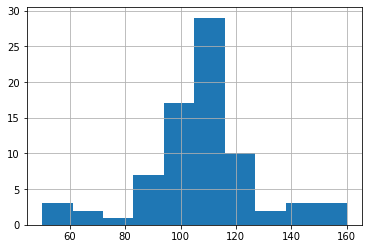

In [61]:
# Question 5
# Plot the calories on a histogram
cereal_df.calories.hist()

Text(0.5, 1.0, 'Sugars by manufacturer')

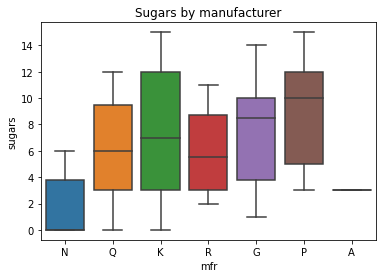

In [70]:
# Question 6
# Use a boxplot to compare cereal manufactures and the amount of sugar they put in their cereal
# Put a title on your plot 'Sugars by manufacturer'
sns.boxplot(data=cereal_df,x='mfr',y='sugars').set_title('Sugars by manufacturer')

Your plot should look like this


![sugars_by_mfr](../img/sugarsbymfg.jpg)

In [75]:
# Question 7
# Replace the single letters with the manufacturers full name, call the new column Manufacturer
# Display the new dataframe
# HINT: pandas offers a replace function that you can do this in one line
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.replace.html?highlight=replace#pandas.Series.replace

cereal_df['Manufacturer']=cereal_df['mfr'].replace(['A','G','K','N','P','Q','R'],['American Home Food Products','General Mills',"Kelloggs",'Nabisco','Post','Quaker Oats','Ralston Purina'])
cereal_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Manufacturer
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.4030,Nabisco
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.9837,Quaker Oats
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.4255,Kelloggs
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.7049,Kelloggs
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.3848,Ralston Purina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.1062,General Mills
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.7533,General Mills
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.7874,Ralston Purina
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.5922,General Mills


In [77]:
# Question 8
# Calculate the average rating by Manufacturer (use the new Manufacturer column)
cereal_df.groupby('Manufacturer')['rating'].mean()

Manufacturer
American Home Food Products    54.8509
General Mills                  34.4859
Kelloggs                       44.0385
Nabisco                        67.9686
Post                           41.7057
Quaker Oats                    42.9160
Ralston Purina                 41.5430
Name: rating, dtype: float64

In [81]:
# Question 9
# Calculate the serving size (weight) in grams rather than ounces
# Store the value in a new column weight_grams
# Display the updated dataframe
# HINT: There are 28.35 grams in an ounce
cereal_df['weight_grams'] = cereal_df['weight']*28.35
cereal_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Manufacturer,weight_grams
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.4030,Nabisco,28.35
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.9837,Quaker Oats,28.35
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.4255,Kelloggs,28.35
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.7049,Kelloggs,28.35
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.3848,Ralston Purina,28.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.1062,General Mills,28.35
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.7533,General Mills,28.35
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.7874,Ralston Purina,28.35
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.5922,General Mills,28.35


In [84]:
# Question 10
# Using the new weight_grams column, calculate a new series sugars_pct which is the grams of sugar per gram of cereal
# Sort the dataframe from highest to lowest sugar_pct and display the dataframe
# HINT: Check out the pandas function `sort_values` 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html?highlight=sort_values#pandas.DataFrame.sort_values
# Look at the examples
cereal_df['sugar_pct']=cereal_df['sugars']/cereal_df['weight_grams']
cereal_df.sort_values('sugar_pct',ascending=False)


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Manufacturer,weight_grams,sugar_pct
30,Golden_Crisp,P,C,100,2,0,45,0.0,11.0,15.0,40.0,25,1,1.00,0.88,35.2524,Post,28.3500,0.5291
66,Smacks,K,C,110,2,1,70,1.0,9.0,15.0,40.0,25,2,1.00,0.75,31.2301,Kelloggs,28.3500,0.5291
6,Apple_Jacks,K,C,110,2,0,125,1.0,11.0,14.0,30.0,25,2,1.00,1.00,33.1741,Kelloggs,28.3500,0.4938
24,Froot_Loops,K,C,110,2,1,125,1.0,11.0,13.0,30.0,25,2,1.00,1.00,32.2076,Kelloggs,28.3500,0.4586
14,Cocoa_Puffs,G,C,110,1,1,180,0.0,12.0,13.0,55.0,25,2,1.00,1.00,22.7364,General Mills,28.3500,0.4586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,Shredded_Wheat,N,C,80,2,0,0,3.0,16.0,0.0,95.0,0,1,0.83,1.00,68.2359,Nabisco,23.5305,0.0000
55,Puffed_Wheat,Q,C,50,2,0,0,1.0,10.0,0.0,50.0,0,3,0.50,1.00,63.0056,Quaker Oats,14.1750,0.0000
54,Puffed_Rice,Q,C,50,1,0,0,0.0,13.0,0.0,15.0,0,3,0.50,1.00,60.7561,Quaker Oats,14.1750,0.0000
65,Shredded_Wheat_spoon_size,N,C,90,3,0,0,3.0,20.0,0.0,120.0,0,1,1.00,0.67,72.8018,Nabisco,28.3500,0.0000
